# Taller 3

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller3.ipynb, con su primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en google colab**

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Viernes 22 de Septiembre 11:59 pm**

## Librerias

In [ ]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate
import sympy as sym
from sympy import symbols
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [ ]:
from matplotlib import rc
rc("animation", html = "jshtml")
sym.init_printing()
#matplotlib.rcParams['animation.embed_limit'] = 2**128

## Problema 1

El siguiente codigo de C++ se obtienen los puntos de un tiro parabólico con los siguientes parametros,

$x_0 = 0\text{ m }$,
$y_0 = 10\text{ m }$,
$v_{x0} = 10\text{ m/s }$,
$v_{y0} = 10\text{ m }$,
$t_f = 2.733 \text{ s }$,
$dt = 0.01 \text{ s }$

y tomando gravedad como,

$g = 10 \text{ m/s }^2$

Además el código en python, y el script gráfican en matplotlib estos puntos,

problema: Modificar el código de `C++` para incluir un tiro parabólico con fricción del aire y con las mismas condiciones iniciales usando el método de Runge-Kutta de 4to orden, al final debe gráficar el tiro parabólico normal y el tiro parabólico con fricción en la misma gráfica.

Tome el coeficiente de fricción del aire y la masa como se definen en el archivo de C++.

$b = 0.2 \text{ kg/s }$,
$m = 1 \text{ kg }$.

El método de Runge-Kutta para ecuaciones diferenciales de segundo orden tiene la forma,

 ![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/runge%20kutta%202nd%20order.png)


In [ ]:
%%writefile parabolico.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>
#define g 10.0
#define m 1
#define b 0.2

using namespace std;

int main() {
    float x_init = 0;
    float y_init = 10;
    float vx_init = 10;
    float vy_init = 10;

    float dt = 0.01;
    float t_total = 2.733;
    cout << "total_time:" <<  t_total << endl;
    int N = t_total/dt;
    cout << N;

    double pos_x[N];
    double pos_y[N];

    for(int i = 0; i <N; i++){
        pos_x[i] = vx_init*i*dt;
        pos_y[i] = y_init + vy_init*i*dt - 0.5*g*pow(i*dt, 2);
    }

    for(int i = 0; i <N; i++){
        cout << pos_x[i] << " ";
        cout << pos_y[i] << " ";
    }

    std::ofstream myfile;
    myfile.open ("x_values.csv");
    myfile << "x,y\n";
    for(int i = 0; i <N; i++){
        myfile << pos_x[i] << ",";
        myfile << pos_y[i] << "\n";
    }
    myfile.close();

    // su codigo aqui



    return 0;
}

Overwriting parabolico.cpp


In [ ]:
%%script bash

g++ parabolico.cpp -o parabolico
./parabolico

total_time:2.733
2730 10 0.1 10.0995 0.2 10.198 0.3 10.2955 0.4 10.392 0.5 10.4875 0.6 10.582 0.7 10.6755 0.8 10.768 0.9 10.8595 1 10.95 1.1 11.0395 1.2 11.128 1.3 11.2155 1.4 11.302 1.5 11.3875 1.6 11.472 1.7 11.5555 1.8 11.638 1.9 11.7195 2 11.8 2.1 11.8795 2.2 11.958 2.3 12.0355 2.4 12.112 2.5 12.1875 2.6 12.262 2.7 12.3355 2.8 12.408 2.9 12.4795 3 12.55 3.1 12.6195 3.2 12.688 3.3 12.7555 3.4 12.822 3.5 12.8875 3.6 12.952 3.7 13.0155 3.8 13.078 3.9 13.1395 4 13.2 4.1 13.2595 4.2 13.318 4.3 13.3755 4.4 13.432 4.5 13.4875 4.6 13.542 4.7 13.5955 4.8 13.648 4.9 13.6995 5 13.75 5.1 13.7995 5.2 13.848 5.3 13.8955 5.4 13.942 5.5 13.9875 5.6 14.032 5.7 14.0755 5.8 14.118 5.9 14.1595 6 14.2 6.1 14.2395 6.2 14.278 6.3 14.3155 6.4 14.352 6.5 14.3875 6.6 14.422 6.7 14.4555 6.8 14.488 6.9 14.5195 7 14.55 7.1 14.5795 7.2 14.608 7.3 14.6355 7.4 14.662 7.5 14.6875 7.6 14.712 7.7 14.7355 7.8 14.758 7.9 14.7795 8 14.8 8.1 14.8195 8.2 14.838 8.3 14.8555 8.4 14.872 8.5 14.8875 8.6 14.902 8.7 14.9155 8.

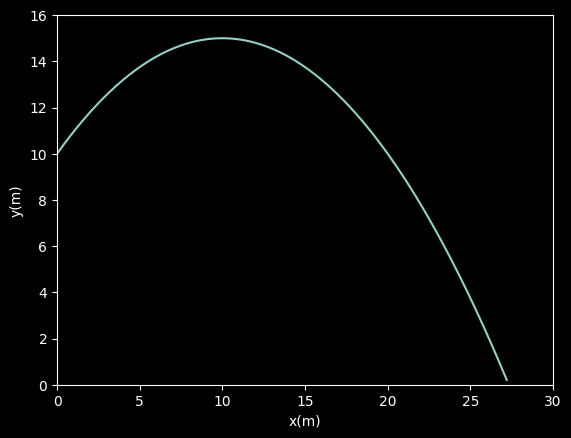

In [ ]:
df = pd.read_csv("./x_values.csv")
#df_damped = pd.read_csv("./x_values_damped.csv")
x = np.array(df["x"])
y = np.array(df["y"])
#x_damped = np.array(df_damped["x"])
#y_damped = np.array(df_damped["y"])

plt.ylim([0, 16])
plt.xlim([0, 30])
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(x, y)
#plt.plot(x_damped, y_damped)
plt.show()

In [ ]:
%%script bash

rm parabolico x_values.csv

## Problema 2

Considere un sistema compuesto por una esfera hueca de radio $R$ y masa $M$ que gira sin deslizar la cual está conectada en su centro a un resorte con longitud natural (sin estirar) $l$ del cual cuelga una masa $m$ como se muestra en la figura.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/pendulo_resorte_cuerpo_rigido.png)

Considere $l_1$, $l_2$, como se muestran en la figura, $f_r$ la fuerza de fricción entre la esfera hueca y la superficie, y $x$, y $y$ como las coordenadas de la masa $m$.

a) Demuestre que las ecuaciones de Newton y de ligadura del sistema son las siguientes,

\begin{align}
m \ddot x &= - k(l_2 - l) \sin{(\theta)} \\
m \ddot y &= - mg + k(l_2 - l) \cos{(\theta)} \\
M \ddot l_1 &= k(l_2 - l) \sin{(\theta)} - f_r \\
f_r &= \frac{2}{3}M \ddot l_1 \\
\ddot x &= \ddot l_1 + \ddot l_2 \sin{(\theta)} + 2 \dot l_2 \cos{(\theta)} \dot \theta - l_2 \sin{(\theta)} (\dot \theta) ^2 + l_2\cos{(\theta)} \ddot \theta\\
\ddot y &= - \ddot l_2 \cos{(\theta)} + 2 \dot l_2 \sin{(\theta)} \dot \theta + l_2 \cos{(\theta)} (\dot \theta) ^2 + l_2\sin{(\theta)} \ddot \theta\\
\end{align}

Sus ecuaciones y demonstración aquí,

.

.

.

.

.





b) Dado que el sistema se puede especificar en términos de solamente las tres coordenadas $(\theta, l_1, l_2)$ independientes, use la libreria **sympy** para resolver las ecuaciones y demonstrar que se obtiene las tres siguientes ecuaciones diferenciales ordinarias de segundo grado,

\begin{equation}
\ddot \theta = \frac{ - 10 Mg\sin{(\theta)} - 20M \dot l_2 \dot \theta - 3k(l_2 - l)\sin{(2\theta)}}{10Ml_2}
\end{equation}

\begin{equation}
\ddot l_1 = \frac{3k(l_2 - l)\sin{(\theta)}}{5M}
\end{equation}

\begin{equation}
\ddot l_2 = g\cos{(\theta)} - \frac{k(l_2-l)}{m} + l_2(\dot \theta)^2 - \frac{3k (l_2 - l)\sin^2{(\theta)}}{5M}
\end{equation}

Se deben imprimir las dos ecuaciones resultantes en el notebook.

In [ ]:
## Su codigo aqui



⎛                                3⋅k⋅l⋅sin(2⋅θ)   3⋅k⋅l₂⋅sin(2⋅θ)             
⎜-M⋅g⋅sin(θ) - 2⋅M⋅l_2__´⋅θ__´ + ────────────── - ───────────────             
⎜                                      10                10        3⋅k⋅(-l + l
⎜────────────────────────────────────────────────────────────────, ───────────
⎝                              M⋅l₂                                        5⋅M

                                                                            ⎞
                                                       2                2   ⎟
₂)⋅sin(θ)             k⋅l   k⋅l₂          2   3⋅k⋅l⋅sin (θ)   3⋅k⋅l₂⋅sin (θ)⎟
─────────, g⋅cos(θ) + ─── - ──── + l₂⋅θ__´  + ───────────── - ──────────────⎟
                       m     m                     5⋅M             5⋅M      ⎠

## Problema 3

A partir de las ecuaciones de segundo grado del problema 1, resuelva las ecuaciones diferenciales anteriores con un tiempo total de 5 segundos y pasos $dt$ de 0.005 segundos, con el método de Runge-Kutta (de 4-to u 8-vo orden) y realice una simulación del movimiento, el resultado esperado debe verse como la siguiente simulación,

(Cambie el siguiente link de youtube por su simulación)

https://www.youtube.com/watch?v=JiHAw8IXkuU

Para la simulación use los siguientes parametros:

$l = 1 \text{ m}, \quad R = 0.2 \text{ m}, \quad l_1(t=0) = -1.5 \text{ m}, \quad l_2(t=0) = 1 \text{ m}, \quad \dot l_1(t=0) = 0.4 \text{ m/s}, \quad \dot l_2(t=0) = 0 \text{ m/s}, \quad m = 8 \text{ kg}, \quad M = 10 \text{ kg}, \quad k = 300 \text{ N/m}, \quad \theta(t=0)= 70^\circ, \quad \dot \theta(t=0)= 0 \text{ rad/s}, \quad dt = 0.005 \text{s}, \quad t_{\text{total}} = 5 \text{ s}$.

In [ ]:
#parámetros
g = 9.8 # m/s^2
m = 8. # kg
M = 10. # kg
k = 300. # N/m
l = 1. # m longitud natural del resorte sin estirar
R = 0.2 # m radio de la esfera hueca
tiempo = 5. # s
puntos = int(tiempo*200) # numero de puntos a evaluar en la trayectoria

# condiciones iniciales
theta_init = 70. * np.pi/180. # angulo inicial respecto a la vertical (rad)
l1_init = -1.5 # m Posicion inicial de la masa M
l2_init = 1. # m longitud inicial del resorte
v1_init = 0.4 # m/s Velocidad inicial la masa M
v2_init = 0. # m/s Velocidad inicial la masa m
omega_init = 0.0 # velocidad angular inicial respecto a la vertical de la masa colgada (rad/s)

In [ ]:
## su simulación aqui


start_time = time.time()
crear_animacion(data, 0, l, m, M, tiempo,fps,'sistema_pendulo_resorte_cuerporigido.gif')
#print("Tiempo usado en crear la animación (s):",time.time() - start_time)

In [ ]:
# use el siguiente codigo para evaluar el tiempo de su simulacion

print("Tiempo usado en crear la animación (s):",time.time() - start_time)

Tiempo usado en crear la animación (s): 11.294831991195679
